# THE SPARKS FOUNDATION GRIP TASK -1

## AUTHOR: MALLIKA ADAK


### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021


#### TASK -1: PREDICTION USING SUPERVISED ML

OBJECTIVE: To predict the percentage of an student based on the No. of study hours

DATASET: http://bit.ly/w-data

### 1) Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2) Reading the Data from the Source

In [2]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dt = pd.read_csv(url)
print("Data Imported Successfully")

dt.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Describing the Dataset

In [3]:
dt.shape

(25, 2)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for null values. True denotes the null values and false denotes the non null values.
dt.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
# Checking for missing values
dt.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 3) Visualizing the Data

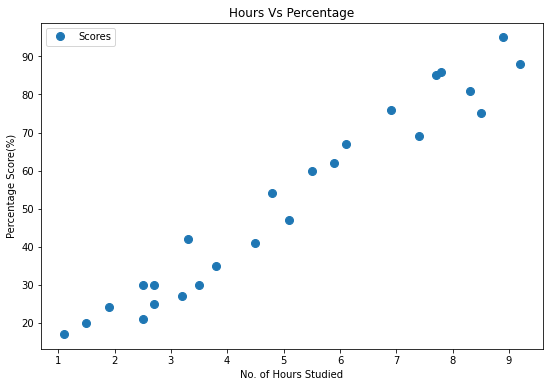

In [8]:
# Plotting the distribution of scores using Matplotlib Library
plt.rcParams["figure.figsize"] = [9,6]
dt.plot(x='Hours', y='Scores', style='o',markersize=8)
plt.title('Hours Vs Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Score(%)')
plt.show()

**Description:** The graphical representation of the scatter plot reflects that there is a strong positive linear relationship between the No. of study hours and the percentage scores obtained.

In [9]:
# Evaluating correlation coefficient between Percentage Score and Hours studied
dt.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### 4) Preparing the Data

In [10]:
# Dividing the data into "attributes" (inputs) and "labels" (outputs)
X = dt.iloc[:, :-1].values
y = dt.iloc[:, 1].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### 5) Splitting the data into Training and Testing sets

In [13]:
#Using train_test_spilt from scikit-learn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 6) Training the model

In [14]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

print("Training Complete")

Training Complete


### 7) Plotting the line of Regression

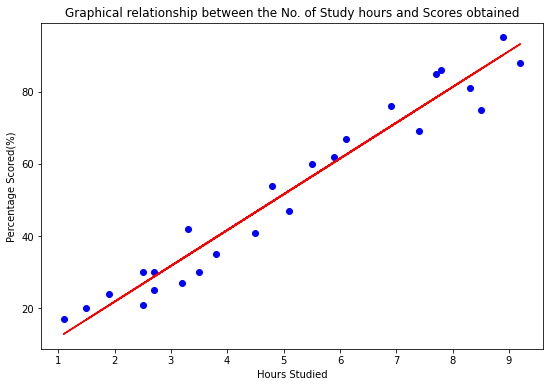

In [15]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting the scatter plot with regression line
plt.scatter(X, y, color='blue', marker='o')
plt.plot(X, line,color='red');
plt.title('Graphical relationship between the No. of Study hours and Scores obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored(%)')
plt.show()

In [16]:
print('intercept= {},\
slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

intercept= 2.018160041434683,slope coefficient=[9.91065648]


### 8) Model Prediction

Now we test the model by making some predictions. For this we use our test-set data.

In [17]:
# Testing data
print(X_test)
# Model Prediction
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### 9) Comparing Actual and Predicted Results

In [18]:
# Comparing Actual Vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


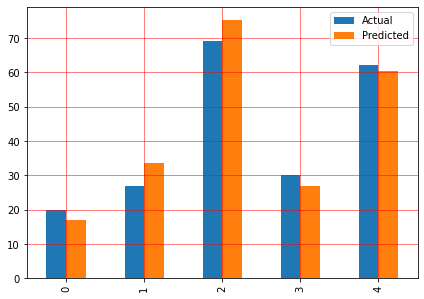

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(7,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')

In [20]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


**Hence, it can be concluded that the predicted score of a person studing for 9.25 hours is 93.69173248737538.**

### 10) Evaluating the Model

The last step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [21]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2: 0.9454906892105356


**Therefore, we have $$R^2 =0.9454 $$ which indicates that 94% proportion of the variance for the dependent variable (percentage score of students) is explained by the independent variable (no. of hours studied) in the simple linear regression model. A higher r-squared indicates a better fit for the model. Here, 94% of the data fits the regression model.**